# Homework - week 2

## 0. Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data import

In [18]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2. EDA

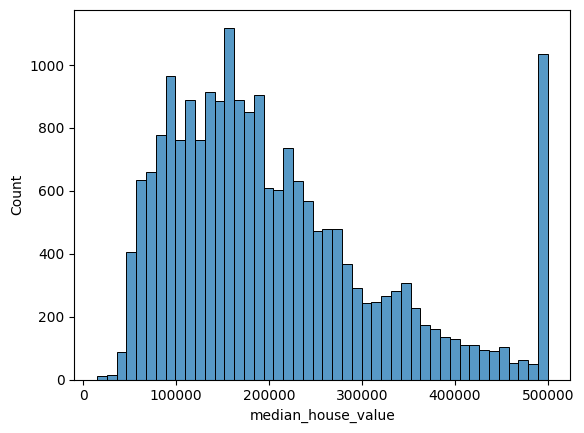

In [19]:
sns.histplot(data.median_house_value);

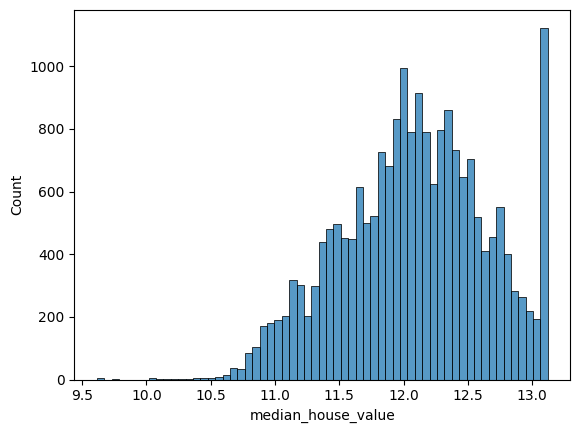

In [20]:
sns.histplot(np.log1p(data.median_house_value));

In [21]:
df = data[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']].copy()

## Question 1

In [22]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'population'?

In [23]:
np.median(df.population)

1166.0

## Question 3

### Split the data

In [24]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [25]:
np.random.seed(0)
np.random.shuffle(df.values)
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,32.58,-117.05,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0
1,33.92,-117.97,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0
2,38.65,-121.84,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0
3,33.20,-115.60,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0
4,37.79,-122.43,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0


In [26]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
print(n_train, n_val, n_test)

12384 4128 4128


In [27]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:n_train+n_train+n_val]
print(len(df_train),len(df_val),len(df_test))

12384 4128 4128


In [28]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [29]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Missing values

In [30]:
def prepare_X_0(df):
    cols = ['latitude','longitude','housing_median_age',
    'total_rooms','total_bedrooms','population',
    'households','median_income']
    df = df[cols]
    df = df.fillna(0)
    return df.values
def prepare_X_mean(df):
    cols = ['latitude','longitude','housing_median_age',
    'total_rooms','total_bedrooms','population',
    'households','median_income']
    df = df[cols]
    df = df.fillna(df_train.total_bedrooms.mean())
    return df.values

### Modeling

In [31]:

def train_linear_regression(X,y, reg=1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)

    XTX_reg = XTX + reg * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX_reg)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

def rmse(y,y_pred):
    error = y - y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [34]:
X_train = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
score_0 = rmse(y_val, y_pred)

In [37]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
score_1 = rmse(y_val, y_pred)

In [38]:
print('zero:',score_0.round(2))
print('mean:', score_1.round(2))
print(f'diff:{((score_1-score_0)/score_0*100).round(2)}%')

zero: 0.34
mean: 0.34
diff:-0.03%


## Question 4

In [39]:
def train_linear_regression(X,y, reg=1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)

    XTX_reg = XTX + reg * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX_reg)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [45]:
results = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression(X_train, y_train, reg=r)

    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    results[r] = {'bias': w0.round(2), 'RMSE': score.round(2)}
results

{0: {'bias': -11.9, 'RMSE': 0.34},
 1e-06: {'bias': -11.9, 'RMSE': 0.34},
 0.0001: {'bias': -11.9, 'RMSE': 0.34},
 0.001: {'bias': -11.88, 'RMSE': 0.34},
 0.01: {'bias': -11.74, 'RMSE': 0.34},
 0.1: {'bias': -10.49, 'RMSE': 0.34},
 1: {'bias': -5.08, 'RMSE': 0.34},
 5: {'bias': -1.54, 'RMSE': 0.35},
 10: {'bias': -0.82, 'RMSE': 0.35}}

In [42]:
results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ['r','bias coeff', 'RMSE']
results_df.sort_values('RMSE', ascending=True)

,r,bias coeff,RMSE
5,0.100000,-10.49,0.338795
4,0.010000,-11.74,0.338820
3,0.001000,-11.88,0.338840
2,0.000100,-11.90,0.338843
0,0.000000,-11.90,0.338843
1,0.000001,-11.90,0.338843
6,1.000000,-5.08,0.341885
7,5.000000,-1.54,0.346657
8,10.000000,-0.82,0.347884


### Question 5

In [50]:
def import_data(path):
    data = pd.read_csv(path)
    return data

def split_data(df, seed, pval=0.2, ptest=0.2):
    n = len(df)
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, df_val, df_test, y_train, y_val, y_test

def prepare_X(df,fill=0):
    cols = ['latitude','longitude','housing_median_age',
    'total_rooms','total_bedrooms','population',
    'households','median_income']
    df = df[cols]
    if fill == 0:
        df = df.fillna(0)
    elif fill == 'mean':
        df = df.fillna(np.mean(df_train.total_bedrooms))
    elif fill == 'median':
        df = df.fillna(np.median(df_train.total_bedrooms))
    else:
        return print('fill not available, try: 0, mean or median')
    return df.values

def train_linear_regression(X,y, reg=1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)

    XTX_reg = XTX + reg * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX_reg)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w
    
def rmse(y,y_pred):
    error = y - y_pred
    se = error**2
    mse = np.mean(se)
    return np.sqrt(mse)

In [51]:
path = 'housing.csv'
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
def test_seeds(path, seeds):
    scores = {}
    for seed in seeds:
        df = import_data(path)
        df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

        X_train = prepare_X(df_train, fill=0)
        w0, w = train_linear_regression(X_train, y_train)

        X_val = prepare_X(df_val, fill=0)
        y_pred = w0 + X_val.dot(w)
        score = rmse(y_val, y_pred)
        scores[seed] = score
        print('seed:',seed, '- rmse:', score)
    return pd.Series(scores)
result = test_seeds(path, seed_values)
print('std:',np.std(result).round(3))

seed: 0 - rmse: 0.34188466919232635
seed: 1 - rmse: 0.5702305643978943
seed: 2 - rmse: 0.5706449180066939
seed: 3 - rmse: 0.569385352626123
seed: 4 - rmse: 0.5687885338880991
seed: 5 - rmse: 0.5702289048215186
seed: 6 - rmse: 0.5691570167740643
seed: 7 - rmse: 0.5695859640075827
seed: 8 - rmse: 0.570597195842834
seed: 9 - rmse: 0.5703891808356513
std: 0.068


### Question 6

In [54]:
def run_test(path, r=1, seed=0, fill=0):
    df = import_data(path)
    df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

    X_train = prepare_X(df_train, fill)
    w0, w = train_linear_regression(X_train, y_train, reg=r)

    X_val = prepare_X(df_val, fill)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    return score

In [55]:
path = 'housing.csv'
run_test(path, r=0.001, seed=9, fill=0)

0.5678967658637859